## Лаб.12

### Hugging Face

---

#### Задание:
Поэкспериментируйте с библиотекой `Transformers` от [Hugging Face](https://huggingface.co/), созданной для приложений обработки естественного языка, и ее платформой, позволяющей пользователям обмениваться моделями машинного обучения и наборами данных.

<img src="lab_12_huggingface.svg">

---

## Анализ эмоциональной окраски статьи о введении санкций
## (оригинальный текст и перевод на другие языки)
### Сохраняются ли эмоции при автоматическом переводе?
Исходный текст:   https://www.gov.uk/government/news/uk-sanctions-the-shady-network-funding-putins-lavish-lifestyle

In [ ]:
!pip install transformers sentencepiece

In [ ]:
from transformers import pipeline

## Анализ эмоциональной окраски исходного текста (на английском языке)

### Подготовка классификатора для текста на английском языке

In [ ]:
classifier_eng = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-emotion")

### Подготовка текста для анализа

Текст, взятый из указанного выше источника, сокращен, чтобы избежать ошибки "превышение максимальной длины строки". Из исходного текста удален список конкретных лиц, на которых наложены санкции

In [ ]:
text_eng = "Foreign Secretary Liz Truss is today (Friday 13 May) announcing fresh sanctions on Putin’s ‘wallet’ of family and friends– those whom he rewards with state positions and wealth in return for their undying loyalty. Official records list modest assets for President Putin including: a small flat in St Petersburg, 2 Soviet-era cars from the 1950s, a trailer, and a small garage. In reality, Putin relies on his network of family, childhood friends, and selected elite who have benefited from his rule and in turn support his lifestyle. Their reward is influence over the affairs of the Russian state that goes far beyond their formal positions. Today’s sanctions will hit this cabal who owe Putin their wealth and power, and in turn support Putin and his war machine. Foreign Secretary Liz Truss said: We are exposing and targeting the shady network propping up Putin’s luxury lifestyle and tightening the vice on his inner circle. We will keep going with sanctions on all those aiding and abetting Putin’s aggression until Ukraine prevails. Putin’s lavish lifestyle has regularly been on display, with reports exposing links to a £566 million yacht and the $1 billion ‘Putin’s Palace’ – officially owned by close associate, Arkady Rotenberg, who was sanctioned in December 2020. His family members form a core contingent of his inner circle – receiving positions of power due to their affiliation to the regime. Today’s sanctions isolate the family members and financiers deep within Putin’s inner circle, compounding the pressure on Putin as he continues his senseless invasion into Ukraine. Since the invasion, the UK has sanctioned over 1,000 individuals and 100 entities, including hitting oligarchs with a net global worth of over £117 billion."

### Применение классификатора

In [ ]:
results = classifier_eng(text_eng)

In [ ]:
results

[{'label': 'joy', 'score': 0.8248132467269897}]

In [ ]:
classifier_eng(text_eng, return_all_scores=True)

/usr/local/lib/python3.8/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'joy', 'score': 0.8248132467269897},
  {'label': 'optimism', 'score': 0.03913231939077377},
  {'label': 'anger', 'score': 0.0645996630191803},
  {'label': 'sadness', 'score': 0.07145477086305618}]]

Как ни странно, основная эмоция - радость

## Анализ эмоциональной окраски текста, полученного с помощью автоматического перевода в браузере (Google Crome)

In [ ]:
text_rus_google = "Министр иностранных дел Лиз Трасс сегодня (пятница, 13 мая) объявляет о новых санкциях в отношении путинского «кошелька» в виде семьи и друзей — тех, кого он награждает государственными должностями и богатством в обмен на их бессмертную лояльность. В официальных документах перечислены скромные активы президента Путина, в том числе: небольшая квартира в Санкт-Петербурге, 2 машины советских времен 1950-х годов, трейлер и небольшой гараж. На самом деле Путин полагается на свою семью, друзей детства и избранную элиту, которые извлекли выгоду из его правления и, в свою очередь, поддерживают его образ жизни. Их награда — влияние на дела Российского государства, выходящее далеко за рамки их формальных позиций. Сегодняшние санкции ударят по клике, которая обязана Путину своим богатством и властью и, в свою очередь, поддерживает Путина и его военную машину. Министр иностранных дел Лиз Трасс сказала: Мы разоблачаем и нацеливаемся на теневую сеть, поддерживающую роскошный образ жизни Путина и затягивающую пороки в его ближайшем окружении. Мы будем продолжать вводить санкции против всех, кто помогает и подстрекает путинскую агрессию, пока Украина не победит. Роскошный образ жизни Путина регулярно демонстрировался в отчетах, раскрывающих связи с яхтой стоимостью 566 миллионов фунтов стерлингов и «Дворцом Путина» стоимостью 1 миллиард долларов, которые официально принадлежат близкому соратнику Аркадию Ротенбергу, который попал под санкции в декабре 2020 года. Сегодняшние санкции изолируют членов семьи и финансистов из ближайшего окружения Путина, усугубляя давление на Путина, поскольку он продолжает свое бессмысленное вторжение в Украину. После вторжения Великобритания ввела санкции в отношении более 1000 физических и 100 юридических лиц, в том числе олигархов с чистым мировым капиталом более 117 миллиардов фунтов стерлингов."

### Подготовка классификатора для текста на русском языке

In [ ]:
classifier_rus = pipeline("text-classification", model="cointegrated/rubert-tiny2-cedr-emotion-detection")

### Применение классификатора

In [ ]:
results = classifier_rus(text_rus_google)

In [ ]:
results

[{'label': 'no_emotion', 'score': 0.990021288394928}]

In [ ]:
classifier_rus(text_rus_google, return_all_scores=True)

[[{'label': 'no_emotion', 'score': 0.990021288394928},
  {'label': 'joy', 'score': 0.00508832698687911},
  {'label': 'sadness', 'score': 0.005151413381099701},
  {'label': 'surprise', 'score': 0.004561194684356451},
  {'label': 'fear', 'score': 0.005040038377046585},
  {'label': 'anger', 'score': 0.005326025653630495}]]

Текст, полученный с помощью автоматического перевода, оказался лишенным эмоциональной окраски. Следует отметить, что у англоязычного классификатора не было варианта 'no_emotion', но даже без учета этого варианта эмоция радости в русскоязычном тексте не на первом месте. 

По всей видимости, это связано с качеством перевода.

Попробуем использовать переводчик из библиотеки Hugging Face.

### Создание переводчика с английского на русский язык

In [ ]:
!pip install sacremoses

In [ ]:
translator_en_ru = pipeline("translation_en_to_ru", model="facebook/wmt19-en-ru", max_length=450)

### Получение перевода

In [ ]:
text_rus_HF = translator_en_ru(text_eng)

In [ ]:
text_rus_HF

[{'translation_text': 'Министр иностранных дел Лиз Трасс сегодня (в пятницу, 13 мая) объявляет о новых санкциях в отношении "кошелька" семьи и друзей Путина - тех, кого он награждает государственными должностями и богатством в обмен на их неизменную лояльность. В официальных отчетах перечисляются скромные активы президента Путина, в том числе: небольшая квартира в Санкт-Петербурге, 2 автомобиля советской эпохи 1950-х годов, трейлер и небольшой гараж. На самом деле, Путин избавляется от своей сети семьи, друзей детства и избранной элиты, которые извлекли выгоду из его правления и, в свою очередь, поддерживают его образ жизни. Их наградой является влияние на дела российского государства, которое выходит далеко за рамки их формального положения. Сегодняшние санкции ударят по этой клике, которая поддерживает Путина своим богатством и властью, и, в свою очередь, поддерживает Путина и его военную машину. Министр иностранных дел Лиз Трасс сказала: Мы расширяем и нацеливаем теневую сеть, подде

Выделение собственно текста

In [ ]:
text_rus_HF[0]['translation_text']

'Министр иностранных дел Лиз Трасс сегодня (в пятницу, 13 мая) объявляет о новых санкциях в отношении "кошелька" семьи и друзей Путина - тех, кого он награждает государственными должностями и богатством в обмен на их неизменную лояльность. В официальных отчетах перечисляются скромные активы президента Путина, в том числе: небольшая квартира в Санкт-Петербурге, 2 автомобиля советской эпохи 1950-х годов, трейлер и небольшой гараж. На самом деле, Путин избавляется от своей сети семьи, друзей детства и избранной элиты, которые извлекли выгоду из его правления и, в свою очередь, поддерживают его образ жизни. Их наградой является влияние на дела российского государства, которое выходит далеко за рамки их формального положения. Сегодняшние санкции ударят по этой клике, которая поддерживает Путина своим богатством и властью, и, в свою очередь, поддерживает Путина и его военную машину. Министр иностранных дел Лиз Трасс сказала: Мы расширяем и нацеливаем теневую сеть, поддерживающую роскошный об

### Применение созданного ранее классификатора к полученному тексту

In [ ]:
results = classifier_rus(text_rus_HF[0]['translation_text'])

In [ ]:
results

[{'label': 'no_emotion', 'score': 0.9883435964584351}]

In [ ]:
classifier_rus(text_rus_HF[0]['translation_text'], return_all_scores=True)

[[{'label': 'no_emotion', 'score': 0.9883435964584351},
  {'label': 'joy', 'score': 0.006324269808828831},
  {'label': 'sadness', 'score': 0.0044560241512954235},
  {'label': 'surprise', 'score': 0.004343254026025534},
  {'label': 'fear', 'score': 0.0045758443884551525},
  {'label': 'anger', 'score': 0.005853788927197456}]]

Опять безэмоциональный текст. Но сейчас после отбрасывания варианта 'no_emotion' эмоция радости будет на первом месте. Хотя и не столь уверенно, как в англоязычном варианте

Можно сделать вывод, что при автоматическом переводе (по крайней мере, с английского языка на русский) эмоциональная окраска текста минимизируется

## Анализ эмоциональной окраски текста, переведенного на итальянский язык

### Создание переводчика с английского на итальянский

In [ ]:
translator_en_it = pipeline("translation_en_to_it", model="Helsinki-NLP/opus-mt-en-it", max_length=450)

In [ ]:
text_it_HF = translator_en_it(text_eng)

In [ ]:
text_it_HF[0]['translation_text']

"Il segretario per gli affari esteri Liz Truss è oggi (venerdì 13 maggio) annunciando nuove sanzioni su Putin e sui suoi amici, tra cui: un piccolo appartamento a San Pietroburgo, 2 auto dell'era sovietica degli anni '50, un rimorchio e un piccolo garage. In realtà, Putin si affida alla sua rete di amici di famiglia, amici d'infanzia, e ha selezionato un'élite che ha beneficiato del suo governo e a sua volta sostiene il suo stile di vita. La loro ricompensa è stata l'influenza sugli affari dello stato russo che va ben oltre le loro posizioni formali. Oggi le sanzioni colpiranno questa cabala che deve a Putin la loro ricchezza e il suo potere, e a sua volta il segretario per gli affari esteri Liz Truss ha messo in atto i suoi legami con i membri della sua famiglia."

### Создание классификатора для итальянского текста

In [ ]:
classifier_it = pipeline("text-classification", model="MilaNLProc/feel-it-italian-emotion")

### Применение класиификатора

In [ ]:
results = classifier_it(text_it_HF[0]['translation_text'])

In [ ]:
results

[{'label': 'anger', 'score': 0.9976606369018555}]

In [ ]:
classifier_it(text_it_HF[0]['translation_text'], return_all_scores=True)

[[{'label': 'anger', 'score': 0.9976606369018555},
  {'label': 'fear', 'score': 0.0015425633173435926},
  {'label': 'joy', 'score': 0.00026535510551184416},
  {'label': 'sadness', 'score': 0.0005315368180163205}]]

Просто поразительный результат!!!

---

## Пример №1: Автоматическое распознавание речи с Hugging Face

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

In [ ]:
# Automatic Speech Recognition with Hugging Face
# model: https://huggingface.co/tasks/automatic-speech-recognition
# audio: https://www.elllo.org/english/0001/050-David-Travel.htm 

from transformers import pipeline
cls = pipeline("automatic-speech-recognition", "facebook/wav2vec2-base-960h")
res = cls("gdrive/My Drive/Colab Notebooks/data/test1.mp3")
print(res)

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'text': "E A TENT SE YES IE WER NOTHING ABOUT SPORTS OEM I'M NOT BIG ON SPORTS BUT OKE WHAT'S THAT'S AKE ASA YOU AT YOU NOT LIKE SPORTS OWHA ID LIKE SWOT BI WAS NOT A AVIDA SPORTS WATCHER I USELY WOUD RATHER WATCH A MOOVY OR SOMGANE HIS HISTORY PROGRAMME O KAS HIERE IN TE HISTORY O YES OKE WHAT CAN A HISTORY A MU CANDIFFICULT QUESTION ND I WOULD SAY I'M INTERESTED PRIMARELY I'M INTERESTED IN ANCIENT AND MEDIEVAL BUT I ALSO LIKE STUDYING THE HISTORY OF THE COUNTRIES THAT I VISIT AND MAKES IT MORE A INTERESTING WHEN I GO SIGHT SEEN OKE WHAT COUNTERYES AVE YOU VISITED IVE BEEN TO TWENTY SIX CENTURIES  REALLY I O KE  E CAN'T LAME Y IS I THE BIG ONES I WOULD SAY I'VE BEEN OVER A GOOD BIT OF EUROPE A MEXICO PERU I SPENT ALMOST A YEAR IN EGYPT ND WHEN TO ISRAEL JORDAN AND NA I'M HERE IN JAPAN I'VE BEEN HERE IN JAPAN A YEAR AND A HALF AND WHILE I'VE BEEN HERE I I VISITED CREER FOR ABOUT A WEEK OKE WAT'S WHAT SU DID YOU SHUT A PYRAMIDS AND O YES I SA I CLIMBED THE PYRAMIDS A REALLY VE WHAT'S A

---

## Пример №2: Языковой перевод с Hugging Face

In [ ]:
# Language Translation using  with Hugging Face
# model: https://huggingface.co/tasks/text2text-generation

from transformers import pipeline
tans = pipeline(task="text2text-generation", model="facebook/m2m100_418M")
mean = tans("That is a flower", forced_bos_token_id=tans.tokenizer.get_lang_id(lang="zh"))
print(mean)

[{'generated_text': '这就是一朵花'}]


---

## Пример №3: Классификация текста по категориям/тегам

In [ ]:
!pip install transformers sentencepiece sacremoses

In [ ]:
from transformers import pipeline
from pprint import pprint

# define the model
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')

# define the candidate labels
candidate_labels = ['politics', 'sports', 'business', 'technology', 'entertainment']

# define the premise
premise = 'The President of Russia is Vladimir Putin'

# use the model to predict the labels
result = classifier(premise, candidate_labels)

pprint(result)

{'labels': ['politics', 'entertainment', 'business', 'technology', 'sports'],
 'scores': [0.9144734144210815,
            0.03190632164478302,
            0.023787936195731163,
            0.017552971839904785,
            0.012279282324016094],
 'sequence': 'The President of Russia is Vladimir Putin'}


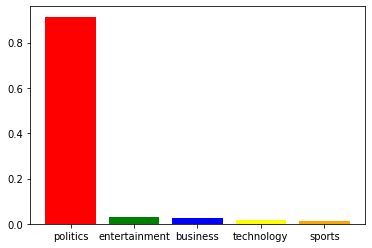

In [ ]:
# visualize the labels
import matplotlib.pyplot as plt

# define the labels
labels = [label for label in result['labels']]
scores = [label for label in result['scores']]
colors = ['red', 'green', 'blue', 'yellow', 'orange']

# plot the labels
plt.bar(labels, scores, color=colors)
plt.show();